   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 267.0 kB/s eta 0:00:00m eta 0:00:010:00:01


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/akash/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


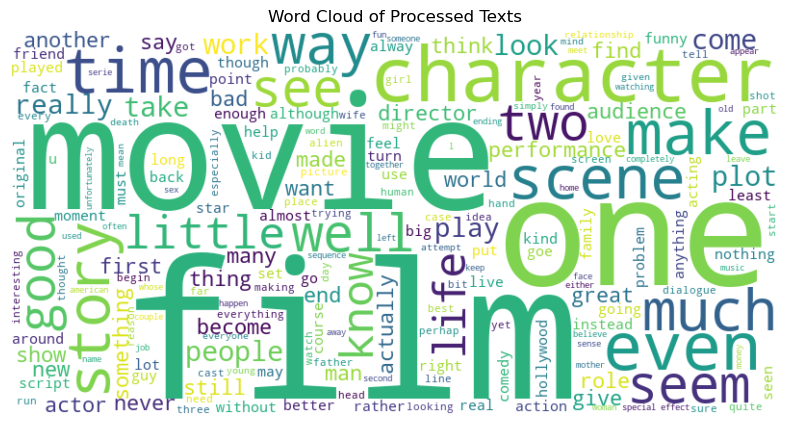

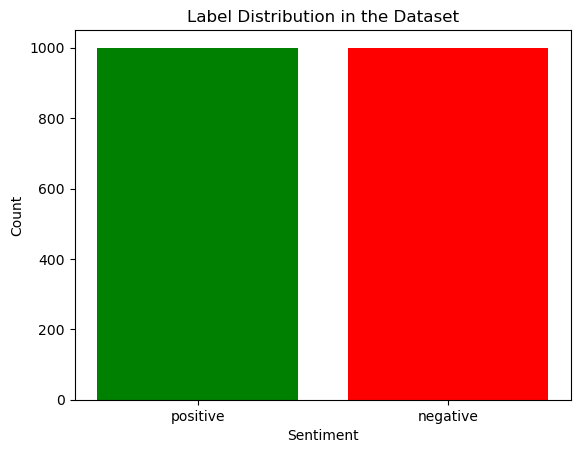

Example 1:
Original Text: " spawn " features good guys , bad guys , lots of fighting , bloody violence , a leather - clad mach...
Processed Text: spawn feature good guy bad guy lot fighting bloody violence leather clad machine gun chick gooey sel...
Label: neg
--------------------------------------------------
Example 2:
Original Text: of course i knew this going in . why is it that whenever a tv - star makes a movie it ' s always a r...
Processed Text: course knew going whenever tv star make movie alway romantic comedy say entertainment tonight someth...
Label: neg
--------------------------------------------------
Example 3:
Original Text: there may not be a critic alive who harbors as much affection for shlock monster movies as i do . i ...
Processed Text: may critic alive harbor much affection shlock monster movie delighted sneaky smart entertainment ron...
Label: neg
--------------------------------------------------
Example 4:
Original Text: this feature is like a double header ,

In [1]:
!pip install matplotlib wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import random
from nltk.corpus import movie_reviews
import nltk
nltk.download('movie_reviews')


def simple_text_preprocessing(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove digits
    text = ''.join([char for char in text if not char.isdigit()])
    # Define a simple list of stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # Remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Perform stemming (using a simple rule-based approach)
    words = [word[:-1] if word.endswith('s') else word for word in words]
    # Perform lemmatization (using a simple rule-based approach)
    words = [word[:-2] if word.endswith('es') else word for word in words]
    # Join the processed words back into a string
    processed_text = ' '.join(words)
    return processed_text


# Load the IMDb movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
# Shuffle the documents
random.shuffle(documents)
# Extract the text and labels from the dataset
texts = [' '.join(words) for words, _ in documents]
labels = [category for _, category in documents]
# Apply text preprocessing to each text in the dataset
processed_texts = [simple_text_preprocessing(text) for text in texts]
# Visualize word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(
    ' '.join(processed_texts))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Texts')
plt.show()
# Visualize label distribution
label_counts = {'positive': labels.count(
    'pos'), 'negative': labels.count('neg')}
plt.bar(label_counts.keys(), label_counts.values(), color=['green', 'red'])
plt.title('Label Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
# Display original and processed texts for the first few examples
for i in range(5):
    print(f"Example {i + 1}:")
    print("Original Text:", texts[i][:100] + "...")
    print("Processed Text:", processed_texts[i][:100] + "...")
    print("Label:", labels[i])
    print("-" * 50)
